In [1]:
import os
import pandas as pd
import tweepy
import random 
import numpy as np
import datetime
from datetime import date
import warnings
import requests


from PIL import Image
import requests
from io import BytesIO

# settings
pd.set_option('display.max_colwidth', None)

In [2]:
# environmental secrets when working locally
from dotenv import load_dotenv
try:
    load_dotenv()
    load_dotenv("../../../")
    print("envs loaded")
except:
    print("envs failed to load")
    pass

envs loaded


# Set up tweepy

In [3]:
#USING GITHUB ENVS

# test
BG1_TWITTER_APIKEY= os.environ["BG1_TWITTER_APIKEY"]
BG1_TWITTER_APIKEYSECRET = os.environ["BG1_TWITTER_APIKEYSECRET"]

BG1_TWITTER_BEARERTOKEN = os.environ["BG1_TWITTER_BEARERTOKEN"]
BG1_TWITTER_ACCESSTOKEN = os.environ["BG1_TWITTER_ACCESSTOKEN"]
BG1_TWITTER_ACCESSTOKENSECRET = os.environ["BG1_TWITTER_ACCESSTOKENSECRET"]

# Authenticate to Twitter
auth = tweepy.OAuthHandler(BG1_TWITTER_APIKEY, BG1_TWITTER_APIKEYSECRET)
auth.set_access_token(BG1_TWITTER_ACCESSTOKEN, BG1_TWITTER_ACCESSTOKENSECRET)

# Create API object 
api = tweepy.API(auth)
api

# Random Image Generator (currently for banner)

file does not exist... yet?
BG twitter banner updated!


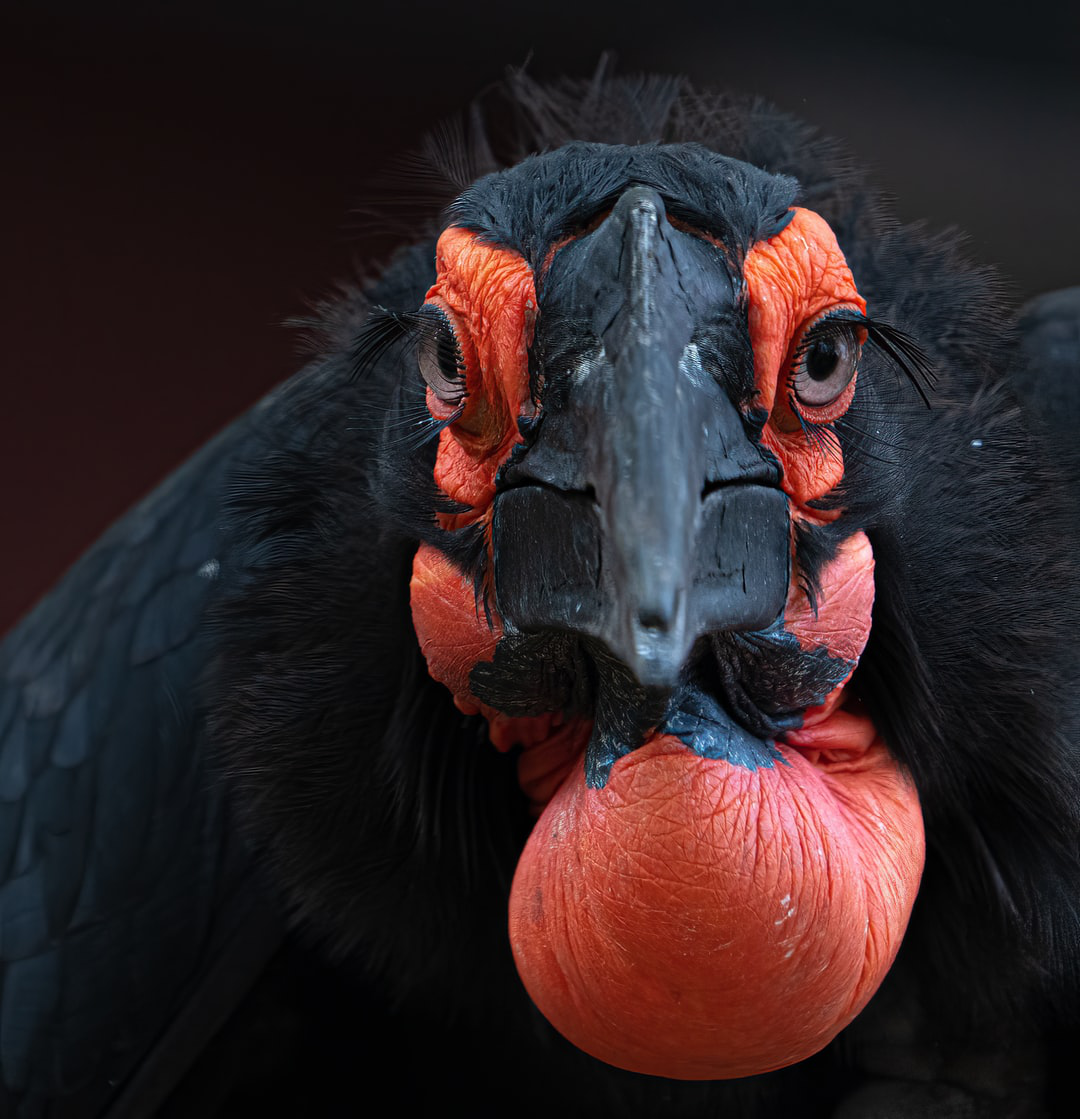

In [4]:
def update_banner():
    # check file, delete if found
    PATH_TO_FILE = "random_image.jpg"
    if os.path.exists(PATH_TO_FILE):
        os.remove(PATH_TO_FILE)
        print("deleted file succesfully")
    else:
        print("file does not exist... yet?")

    # upload new one
    response = requests.get("https://source.unsplash.com/user/boligrafica/likes")
    img = Image.open(BytesIO(response.content))
    img.save("random_image.jpg")

    #update banner
    api.update_profile_banner("random_image.jpg")
    print('BG twitter banner updated!')

    return img


# run
img = update_banner()

#show image
img